In [1]:
!wget -r -A .html -P rtdocs https://langchain.readthedocs.io/en/latest/

--2023-03-26 14:52:19--  https://langchain.readthedocs.io/en/latest/
Resolving langchain.readthedocs.io (langchain.readthedocs.io)... 104.17.33.82, 104.17.32.82
Connecting to langchain.readthedocs.io (langchain.readthedocs.io)|104.17.33.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://python.langchain.com/en/latest/ [following]
--2023-03-26 14:52:20--  https://python.langchain.com/en/latest/
Resolving python.langchain.com (python.langchain.com)... 104.17.32.82, 104.17.33.82
Connecting to python.langchain.com (python.langchain.com)|104.17.32.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'rtdocs/langchain.readthedocs.io/en/latest/index.html'

     0K .......... .......... .......... .......... ..........  526K
    50K .......... ........                                    1.17M=0.1s

2023-03-26 14:52:21 (620 KB/s) - 'rtdocs/langchain.readthedocs.io/en/latest/index.html' saved [70403

In [17]:
from langchain.document_loaders import ReadTheDocsLoader

loader = ReadTheDocsLoader("rtdocs")
docs = loader.load()
len(docs)

397

In [18]:
docs[0]

Document(page_content='.md\n.pdf\nDeployments\n Contents \nStreamlit\nGradio (on Hugging Face)\nBeam\nVercel\nSteamShip\nDeployments#\nSo you’ve made a really cool chain - now what? How do you deploy it and make it easily sharable with the world?\nThis section covers several options for that.\nNote that these are meant as quick deployment options for prototypes and demos, and not for production systems.\nIf you are looking for help with deployment of a production system, please contact us directly.\nWhat follows is a list of template GitHub repositories aimed that are intended to be\nvery easy to fork and modify to use your chain.\nThis is far from an exhaustive list of options, and we are EXTREMELY open to contributions here.\nStreamlit#\nThis repo serves as a template for how to deploy a LangChain with Streamlit.\nIt implements a chatbot interface.\nIt also contains instructions for how to deploy this app on the Streamlit platform.\nGradio (on Hugging Face)#\nThis repo serves as a te

In [19]:
list(docs[0])

[('page_content',
  '.md\n.pdf\nDeployments\n Contents \nStreamlit\nGradio (on Hugging Face)\nBeam\nVercel\nSteamShip\nDeployments#\nSo you’ve made a really cool chain - now what? How do you deploy it and make it easily sharable with the world?\nThis section covers several options for that.\nNote that these are meant as quick deployment options for prototypes and demos, and not for production systems.\nIf you are looking for help with deployment of a production system, please contact us directly.\nWhat follows is a list of template GitHub repositories aimed that are intended to be\nvery easy to fork and modify to use your chain.\nThis is far from an exhaustive list of options, and we are EXTREMELY open to contributions here.\nStreamlit#\nThis repo serves as a template for how to deploy a LangChain with Streamlit.\nIt implements a chatbot interface.\nIt also contains instructions for how to deploy this app on the Streamlit platform.\nGradio (on Hugging Face)#\nThis repo serves as a temp

In [22]:
print(docs[0].page_content)

.md
.pdf
Deployments
 Contents 
Streamlit
Gradio (on Hugging Face)
Beam
Vercel
SteamShip
Deployments#
So you’ve made a really cool chain - now what? How do you deploy it and make it easily sharable with the world?
This section covers several options for that.
Note that these are meant as quick deployment options for prototypes and demos, and not for production systems.
If you are looking for help with deployment of a production system, please contact us directly.
What follows is a list of template GitHub repositories aimed that are intended to be
very easy to fork and modify to use your chain.
This is far from an exhaustive list of options, and we are EXTREMELY open to contributions here.
Streamlit#
This repo serves as a template for how to deploy a LangChain with Streamlit.
It implements a chatbot interface.
It also contains instructions for how to deploy this app on the Streamlit platform.
Gradio (on Hugging Face)#
This repo serves as a template for how deploy a LangChain with Gradio

In [23]:
print(docs[0].metadata["source"].replace("rtdocs\\", "https://"))

https://langchain.readthedocs.io\en\latest\deployments.html


In [24]:
import tiktoken

tokenizer = tiktoken.get_encoding(tiktoken.encoding_for_model("gpt-3.5-turbo").name)

def count_tokens(text):
    tokens = tokenizer.encode(text, disallowed_special=())

    return len(tokens)

In [25]:
token_count = [count_tokens(doc.page_content) for doc in docs]

In [26]:
print(f'''
MIN: {min(token_count)}
AVG: {int(sum(token_count) / len(token_count))}
MAX: {max(token_count)}
'''.strip())

MIN: 45
AVG: 1329
MAX: 57674


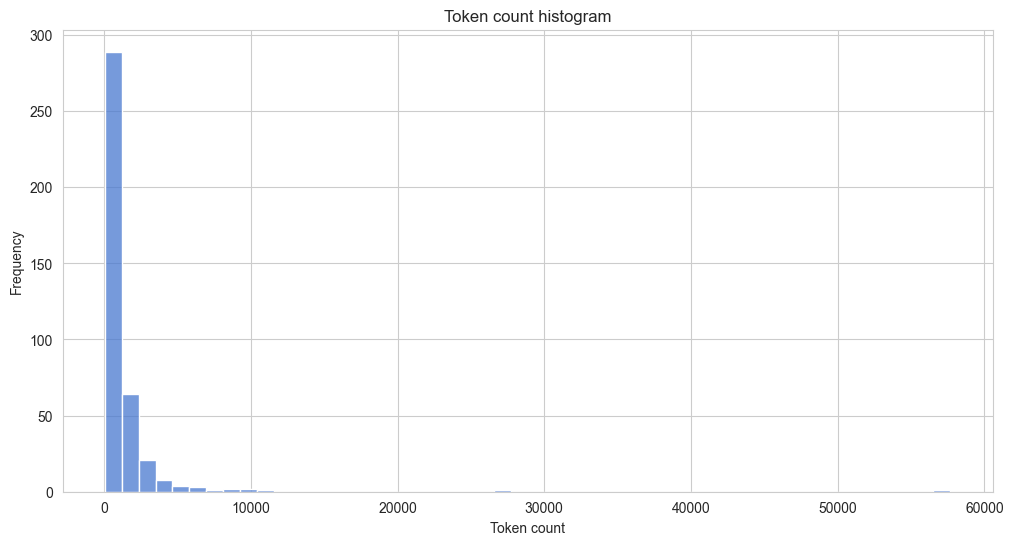

In [27]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("muted")

plt.figure(figsize=(12, 6))
sns.histplot(token_count, kde=False, bins=50)

plt.title("Token count histogram")
plt.xlabel("Token count")
plt.ylabel("Frequency")

plt.show()

In [28]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,
    length_function=count_tokens,
    separators=["\n\n", "\n", " ", ""]
)

In [29]:
chunks = text_splitter.split_text(docs[5].page_content)

In [30]:
print(len(chunks))

for chunk in chunks:
    print(len(chunk.split(" ")), count_tokens(chunk))

4
237 375
294 375
254 368
106 147


In [31]:
import hashlib

m = hashlib.md5()

url = docs[5].metadata["source"].replace("rtdocs\\", "https://")
print(url)

m.update(url.encode("utf-8"))
url_id = m.hexdigest()[:12]
print(url_id)

https://langchain.readthedocs.io\en\latest\index.html
30b694fe53d5


In [32]:
data = [{"id": f"{url_id}-{i}", "text": chunk, "source": url} for i, chunk in enumerate(chunks)]
data

[{'id': '30b694fe53d5-0',
  'text': '.rst\n.pdf\nWelcome to LangChain\n Contents \nGetting Started\nModules\nUse Cases\nReference Docs\nLangChain Ecosystem\nAdditional Resources\nWelcome to LangChain#\nLarge language models (LLMs) are emerging as a transformative technology, enabling\ndevelopers to build applications that they previously could not.\nBut using these LLMs in isolation is often not enough to\ncreate a truly powerful app - the real power comes when you are able to\ncombine them with other sources of computation or knowledge.\nThis library is aimed at assisting in the development of those types of applications. Common examples of these types of applications include:\n❓ Question Answering over specific documents\nDocumentation\nEnd-to-end Example: Question Answering over Notion Database\n💬 Chatbots\nDocumentation\nEnd-to-end Example: Chat-LangChain\n🤖 Agents\nDocumentation\nEnd-to-end Example: GPT+WolframAlpha\nGetting Started#\nCheckout the below guide for a walkthrough of 

In [33]:
from tqdm.auto import tqdm

m = hashlib.md5()

documents = []

for doc in tqdm(docs):
    chunks = text_splitter.split_text(doc.page_content)
    url = doc.metadata["source"].replace("rtdocs\\", "https://")
    m.update(url.encode("utf-8"))
    url_id = m.hexdigest()[:12]

    data = [{"id": f"{url_id}-{i}", "text": chunk, "source": url} for i, chunk in enumerate(chunks)]
    documents.extend(data) 

  0%|          | 0/397 [00:00<?, ?it/s]

In [34]:
documents

[{'id': 'a2170e7e03b4-0',
  'text': '.md\n.pdf\nDeployments\n Contents \nStreamlit\nGradio (on Hugging Face)\nBeam\nVercel\nSteamShip\nDeployments#\nSo you’ve made a really cool chain - now what? How do you deploy it and make it easily sharable with the world?\nThis section covers several options for that.\nNote that these are meant as quick deployment options for prototypes and demos, and not for production systems.\nIf you are looking for help with deployment of a production system, please contact us directly.\nWhat follows is a list of template GitHub repositories aimed that are intended to be\nvery easy to fork and modify to use your chain.\nThis is far from an exhaustive list of options, and we are EXTREMELY open to contributions here.\nStreamlit#\nThis repo serves as a template for how to deploy a LangChain with Streamlit.\nIt implements a chatbot interface.\nIt also contains instructions for how to deploy this app on the Streamlit platform.\nGradio (on Hugging Face)#\nThis repo 

In [35]:
len(documents)

2237

In [39]:
import json

with open("train.jsonl", "w") as f:
    for doc in documents:
        f.write(json.dumps(doc) + "\n")

In [42]:
documents_loaded = []

with open("train.jsonl", "r") as f:
    for line in f:
        documents_loaded.append(json.loads(line))

In [43]:
len(documents_loaded)

2237